<a href="https://colab.research.google.com/github/Davioliveira1305/Machine-Learning/blob/main/DAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição

**The Z-Alizadeh Sani dataset is one of the most common datasets used in machine learning for automatic CAD detection. This dataset contains 303 samples (216 CAD patients and 87 normal) with 55 features. The main features of this dataset are four categories: (1) Demographic, (2) symptoms and examination, (3) electrocardiogram, and (4) laboratory and echo features**
* **The main advantage of this dataset is its completeness. There are no missing values or outliers in this dataset**
* **This dataset is publicly available in the UCI Machine Learning repository for researchers📚**

##Recursos do conjunto de dados Z-Alizadeh Sani


**Demographic**:
* Age 30–86
* Weight 48–120
* Sex Male, female
* BMI (body mass index Kg/m2) 18–41
* DM (Diabetes Mellitus) Yes, no
* HTN (hyper tension) Yes, no
* Current smoker Yes, no
* Ex-Smoker Yes, no
* FH (family history) Yes, no
* Obesity Yes if MBI > 25, no otherwise
* CRF (chronic renal failure) Yes, no
* CVA (Cerebrovascular Accident) Yes, no
* Airway disease Yes, no
* Thyroid Disease Yes, no
* CHF (congestive heart failure) Yes, no
* DLP (Dyslipidemia) Yes, no

**Symptom and examination :**
* BP (blood pressure: mmHg) 90–190
* PR (pulse rate) (ppm) 50–110
* Edema Yes, no
* Weak peripheral pulse Yes, no
* Lung rales Yes, no
* Systolic murmur Yes, no
* Diastolic murmur Yes, no
* Typical Chest Pain Yes, no
* Dyspnea Yes, no
* Function class 1, 2, 3, 4
* Atypical Yes, no
* Nonanginal CP Yes, no
* Exertional CP (Exertional Chest Pain) Yes, no
* Low Th Ang (low Threshold angina) Yes, no

**ECG:**
* Rhythm Sin, AF
* Q Wave Yes, no
* ST Elevation Yes, no
* ST Depression Yes, no
* T inversion Yes, no
* LVH (left ventricular hypertrophy) Yes, no
* Poor R progression (poor R wave progression) Yes, no

**Laboratory and echo:**
* FBS (fasting blood sugar) (mg/dl) 62–400
* Cr (creatine) (mg/dl) 0.5–2.2
* TG (triglyceride) (mg/dl) 37–1050
* LDL (low density lipoprotein) (mg/dl) 18–232
* HDL (high density lipoprotein) (mg/dl) 15–111
* BUN (blood urea nitrogen) (mg/dl) 6–52
* ESR (erythrocyte sedimentation rate) (mm/h) 1–90
* HB (hemoglobin) (g/dl) 8.9–17.6
* K (potassium) (mEq/lit) 3.0–6.6
* Na (sodium) (mEq/lit) 128–156
* WBC (white blood cell) (cells/ml) 3700–18,000
* Lymph (Lymphocyte) (%) 7–60
* Neut (neutrophil) (%) 32–89
* PLT (platelet) (1000/ml) 25–742
* EF (ejection fraction) (%) 15–60
* Region with RWMA (regional wall motion abnormality) 0, 1, 2, 3, 4
* VHD (valvular heart disease) Normal, mild, moderate, severe

##Leitura do DataSet

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/CAD.csv')

In [3]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


##Análise exploratória dos dados e pré-processamento.

**Tipos dos dados.**

In [4]:
data.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             object
LowTH Ang 

**Verificando se existem valores nulos no dataframe, observem que não existem valores nulos nas colunas do dataframe.**

In [5]:
data.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

###Transformando dados categóricos em dados numéricos

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
vetor_colunas = []
colunas_modificadas = []
for i in data.columns:
  if data[i].dtype == object:
    vetor_colunas.append(i)
    colunas_modificadas.append(i)
for j in vetor_colunas:
  data[j] = label_encoder.fit_transform(data[j])

In [7]:
print(f'Colunas que tiveram o tipo modificadas para inteiro: {colunas_modificadas}')

Colunas que tiveram o tipo modificadas para inteiro: ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'VHD', 'Cath']


###Verificando a quantidade de elementos distintos em cada coluna

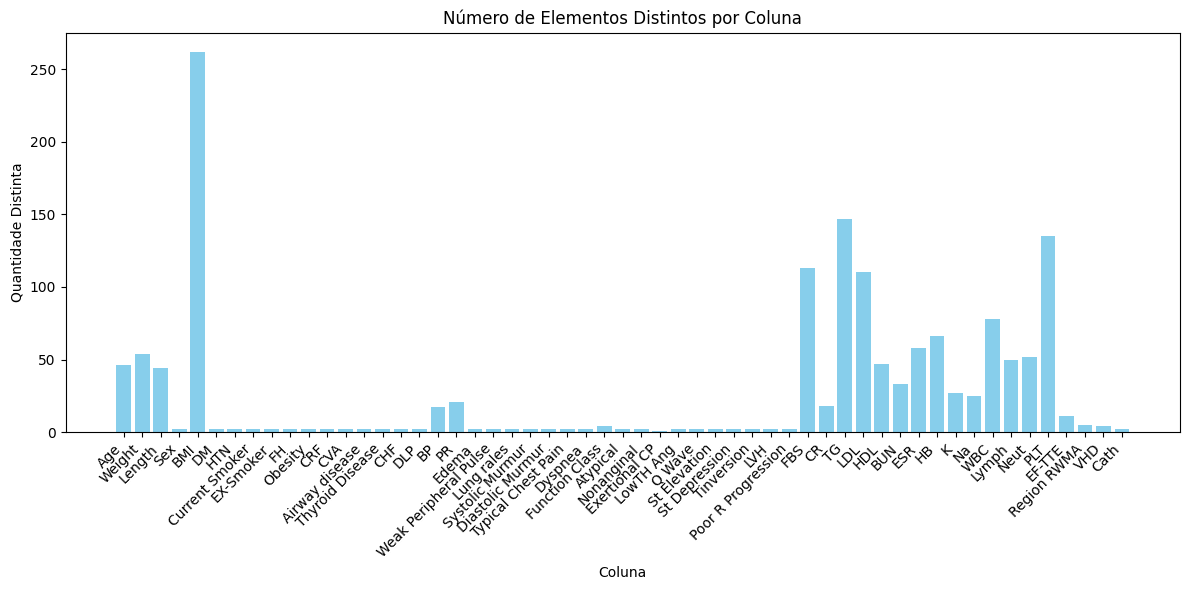

In [8]:
import matplotlib.pyplot as plt
import numpy
colunas_do_dataframe = data.columns
colunas = []
qtde_dist = []
colunas_binarias = []
colunas_continuas = []
colunas_ordinais = []
for i in colunas_do_dataframe:
  num_elementos_diferentes = len(data[i].unique())
  if num_elementos_diferentes <= 2:
    colunas_binarias.append(i)
  elif num_elementos_diferentes == 4 or num_elementos_diferentes == 5:
    colunas_ordinais.append(i)
  else:
    colunas_continuas.append(i)
  colunas.append(i)
  qtde_dist.append(num_elementos_diferentes)
plt.figure(figsize=(12, 6))
plt.bar(colunas, qtde_dist, color='skyblue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade Distinta')
plt.title('Número de Elementos Distintos por Coluna')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**O dataframe possui muitas colunas binárias, ou seja, que só possuem dois elementos distintos.**

In [9]:
print(f'Colunas Binárias:{colunas_binarias}')

Colunas Binárias:['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']


In [10]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


In [11]:
data.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                        int64
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                    int64
CRF                        int64
CVA                        int64
Airway disease             int64
Thyroid Disease            int64
CHF                        int64
DLP                        int64
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse      int64
Lung rales                 int64
Systolic Murmur            int64
Diastolic Murmur           int64
Typical Chest Pain         int64
Dyspnea                    int64
Function Class             int64
Atypical                   int64
Nonanginal                 int64
Exertional CP              int64
LowTH Ang 

###Histograma das colunas binárias

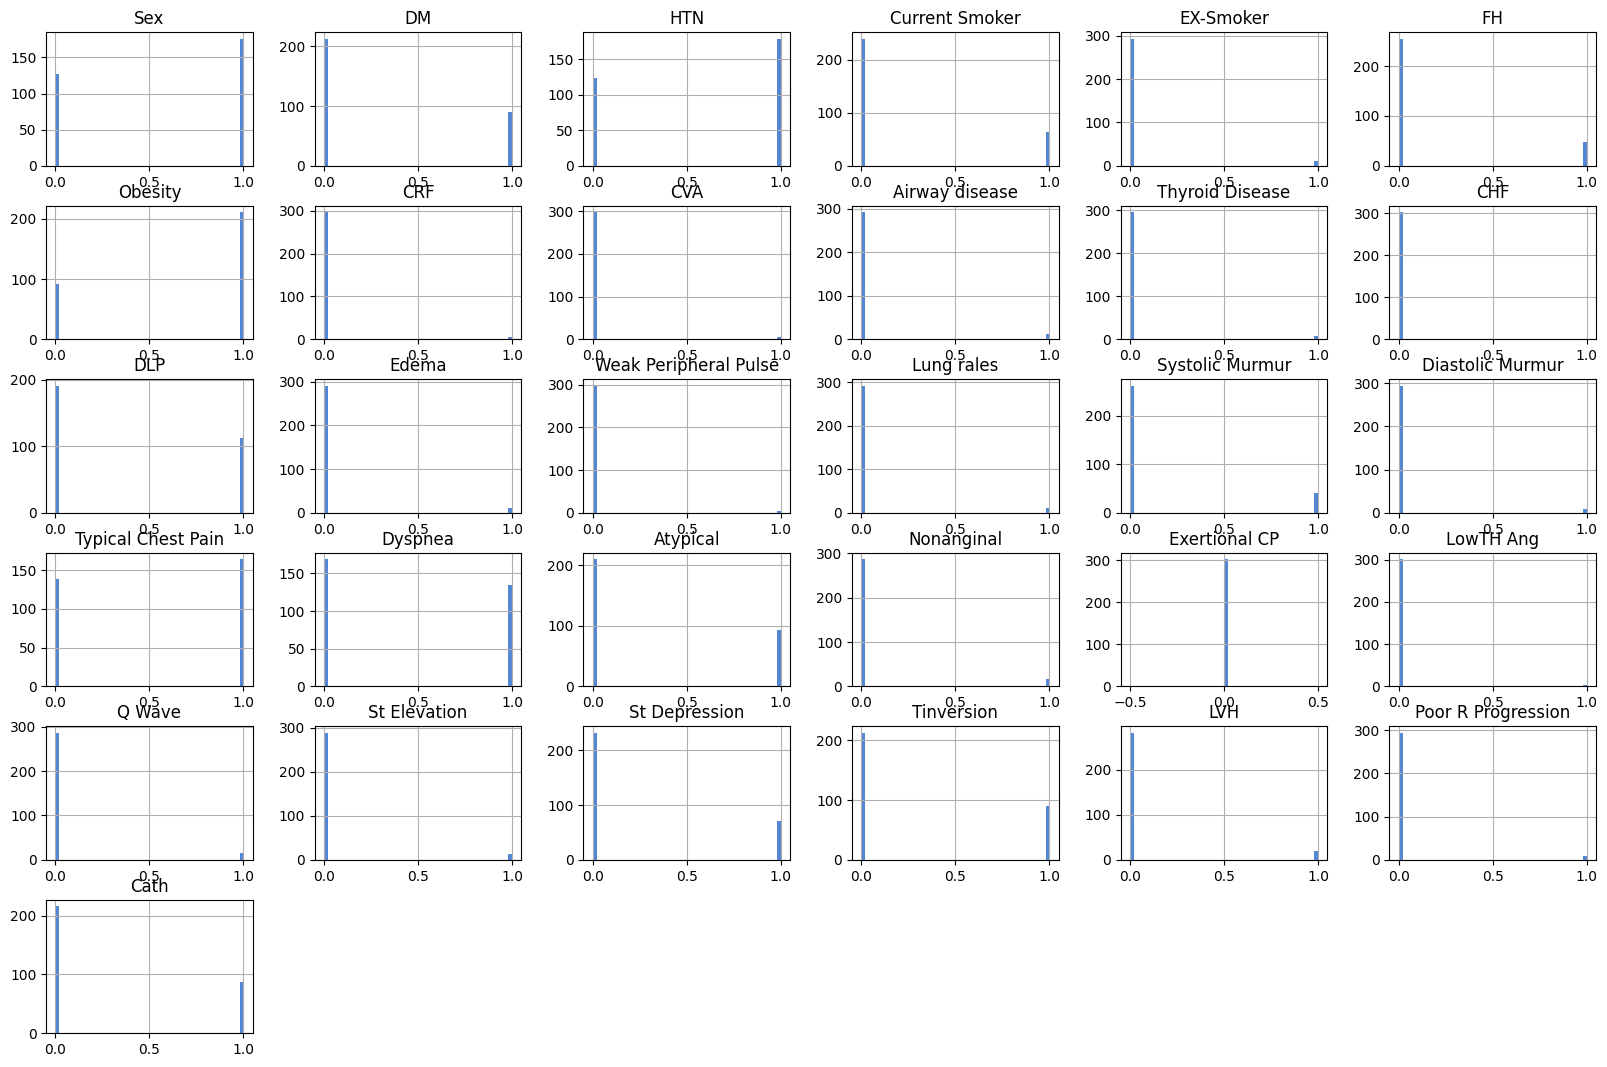

In [12]:
import matplotlib.pyplot as plt
data_binarias = data[colunas_binarias]
data_binarias.hist(bins=50, figsize=(20,13), color='#5486d6') # Retirando o atributo de ID do passageiro
plt.show()

###Associação entre as colunas binárias e a coluna alvo(Cath)

In [13]:
import seaborn as sns

**Gráfico violino entre Sex e Cath**

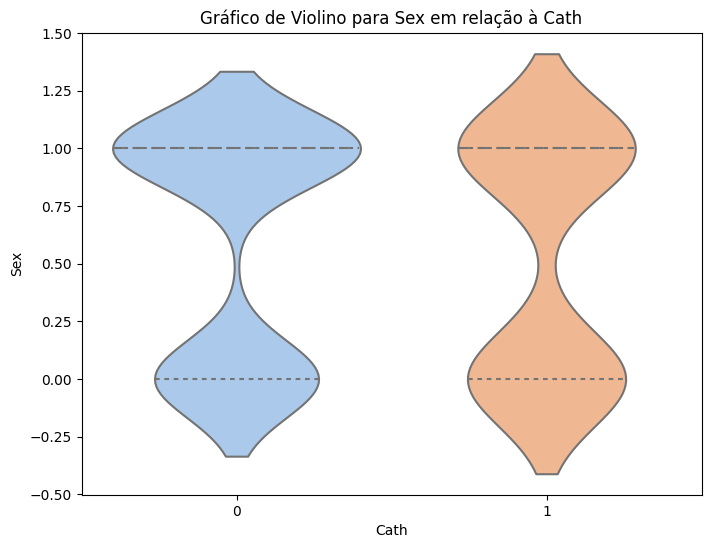

In [14]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Sex', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Sex em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Sex')
plt.show()

**Gráfico violino entre DM e Cath**

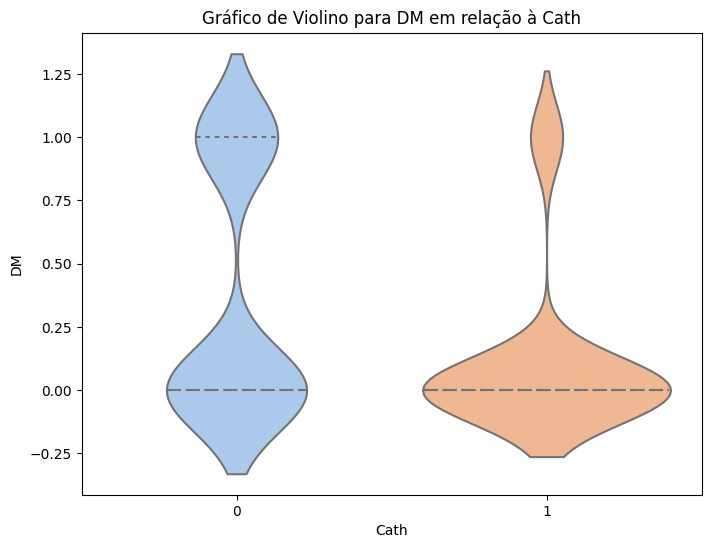

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='DM', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para DM em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('DM')
plt.show()

**Gráfico Violino entre HTN e Cath**


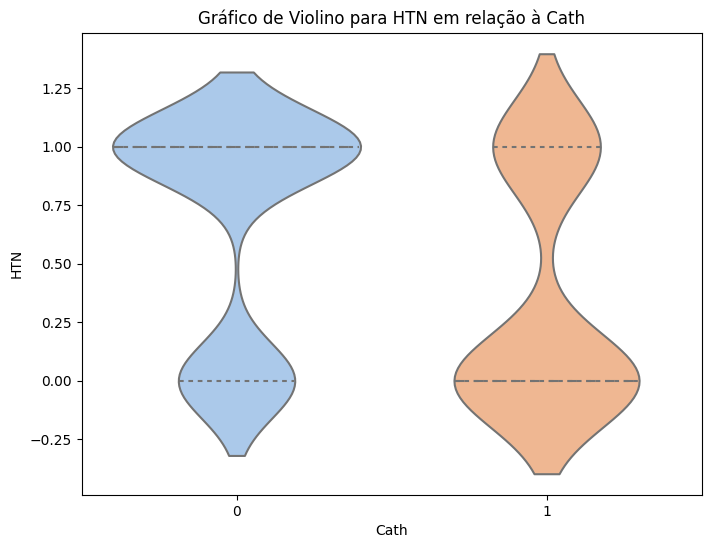

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='HTN', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para HTN em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('HTN')
plt.show()

**Gráfico violino entre Current Smoker e Cath**

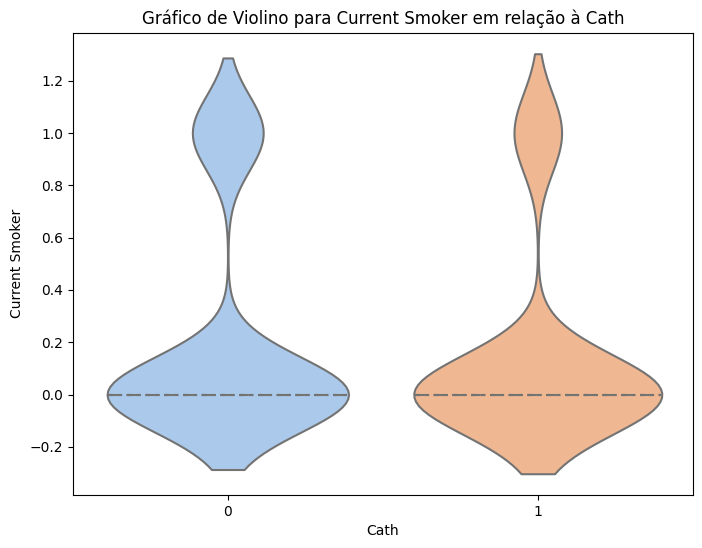

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Current Smoker', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Current Smoker em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Current Smoker')
plt.show()

**Gráfico violino entre EX-Smoker e Cath**

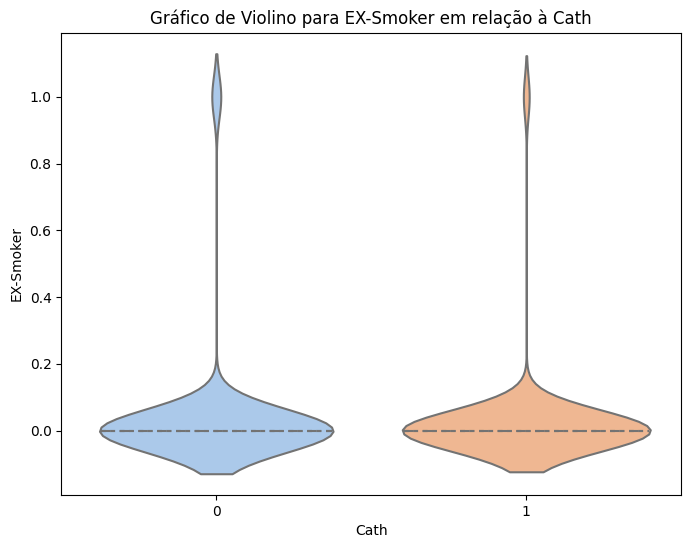

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='EX-Smoker', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para EX-Smoker em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('EX-Smoker')
plt.show()

**Gráfico violino entre FH e Cath**

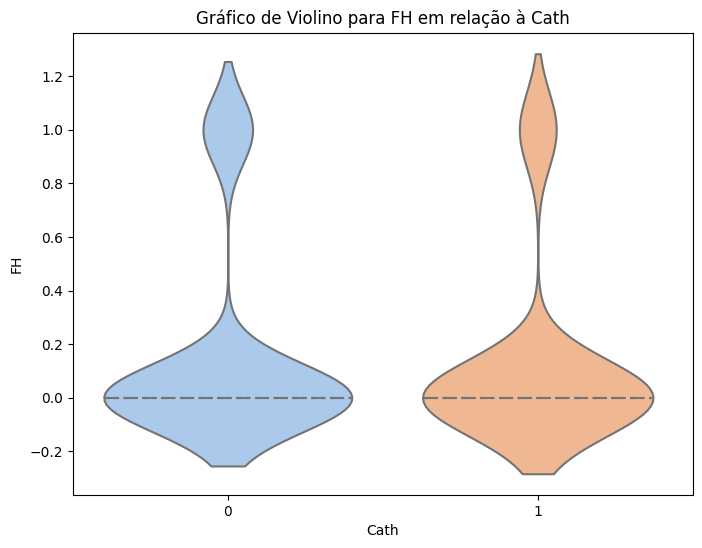

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='FH', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para FH em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('FH')
plt.show()

**Gráfico violino entre Obesity e Cath**

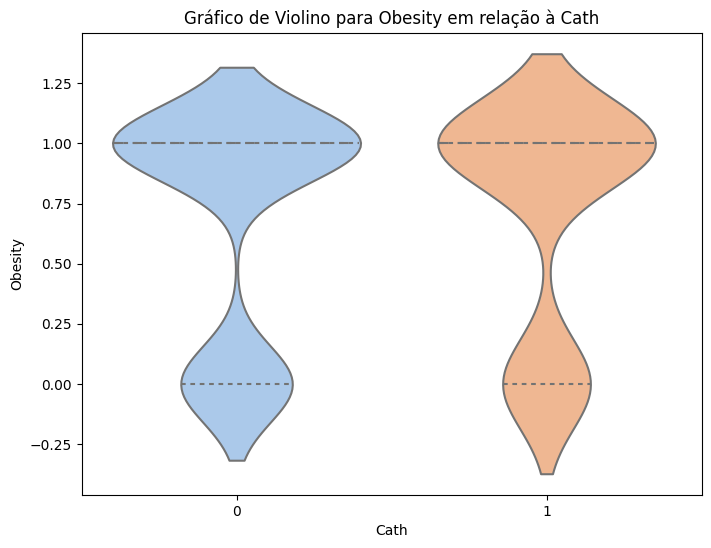

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Obesity', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Obesity em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Obesity')
plt.show()

**Gráfico violino entre CRF e Cath**

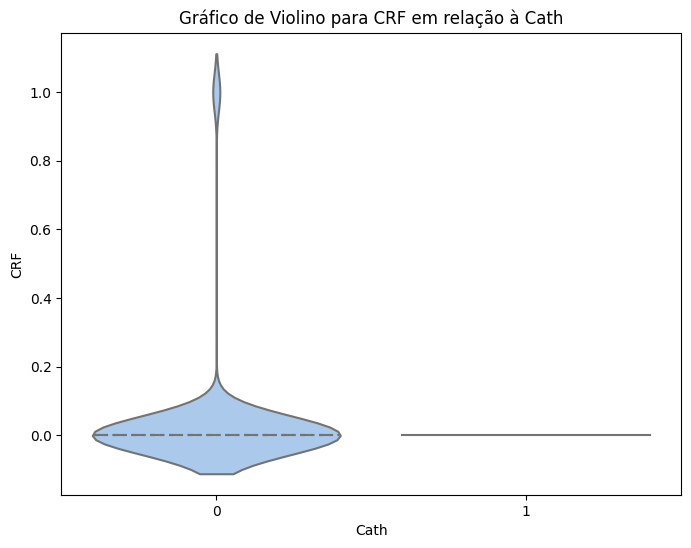

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='CRF', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para CRF em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('CRF')
plt.show()

**Gráfico violino entre CVA e Cath**

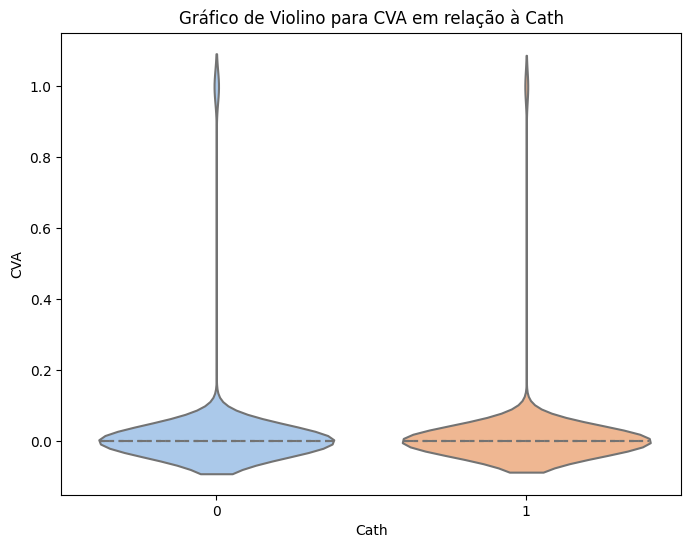

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='CVA', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para CVA em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('CVA')
plt.show()

**Gráfico violino entre Airway disease e Cath**

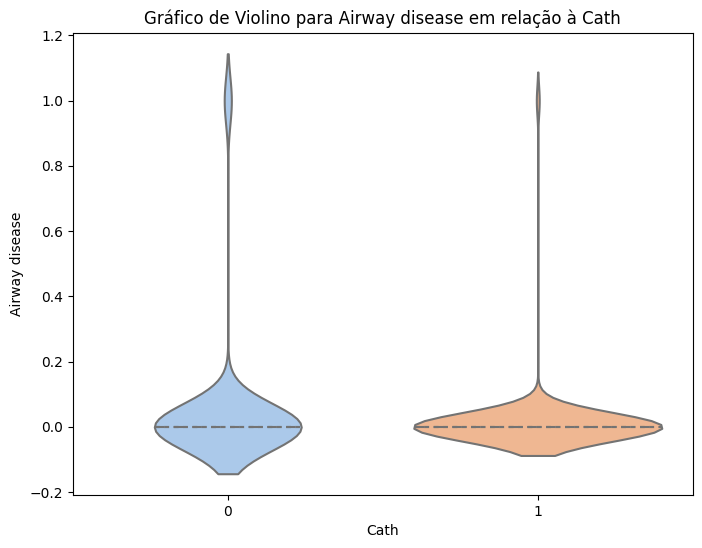

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Airway disease', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Airway disease em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Airway disease')
plt.show()

**Gráfico violino entre Thyroid Disease e Cath**

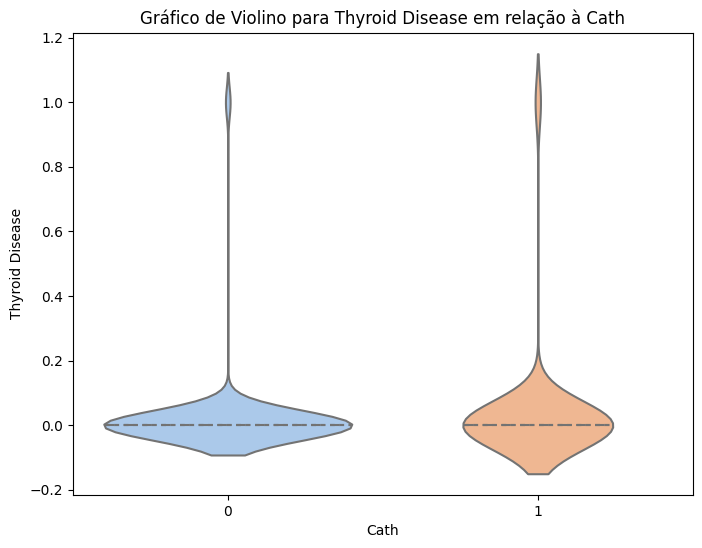

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Thyroid Disease', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Thyroid Disease em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Thyroid Disease')
plt.show()

**Gráfico violino entre CHF e Cath**

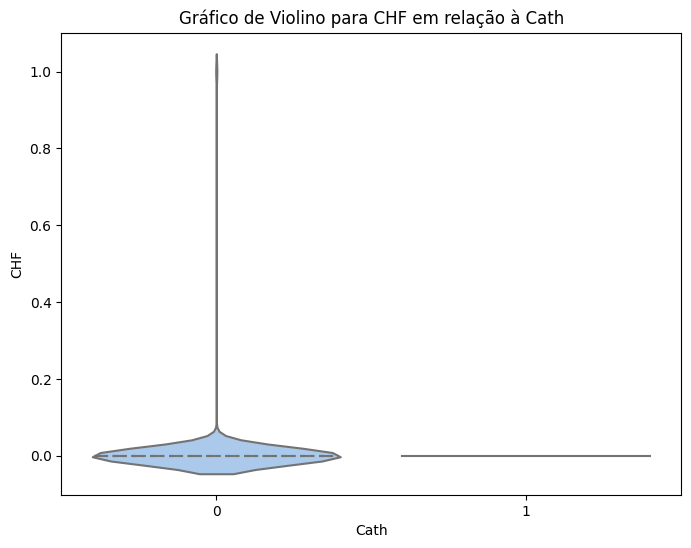

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='CHF', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para CHF em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('CHF')
plt.show()

**Gráfico violino entre DLP e Cath**

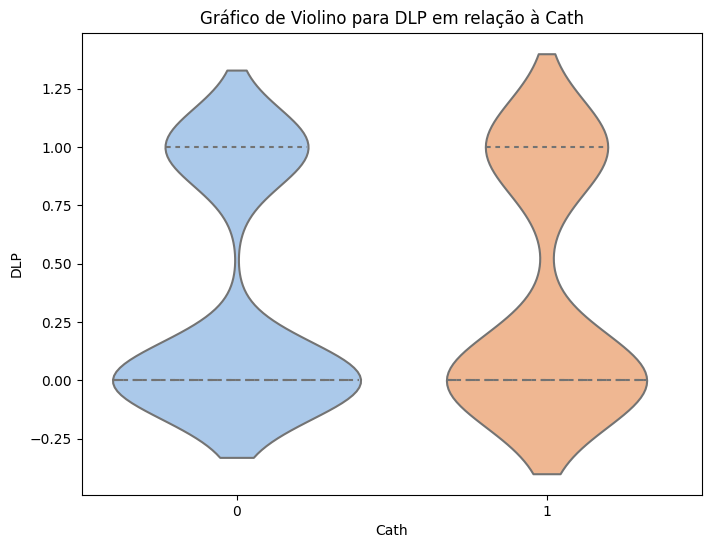

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='DLP', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para DLP em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('DLP')
plt.show()

**Gráfico violino entre Edema e Cath**

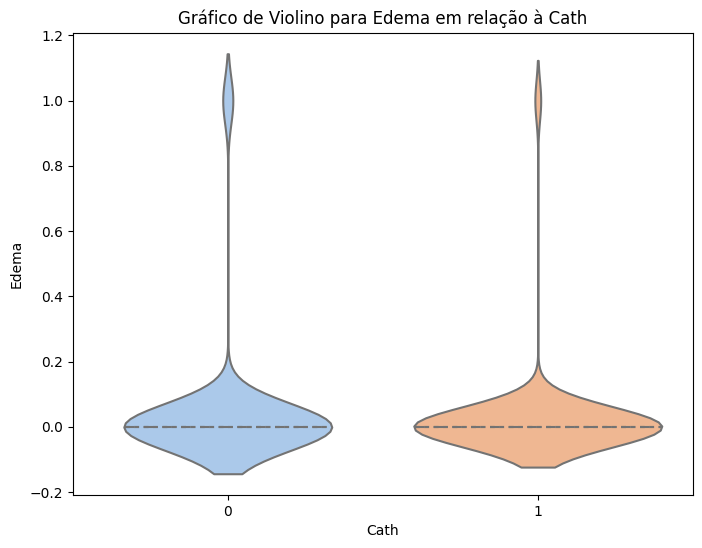

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Edema', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Edema em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Edema')
plt.show()

**Gráfico violino entre Weak Peripheral**

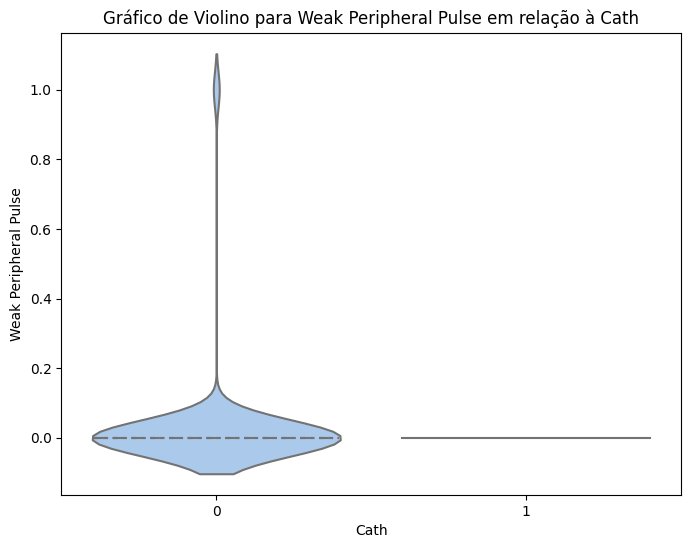

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Weak Peripheral Pulse', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Weak Peripheral Pulse em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Weak Peripheral Pulse')
plt.show()

**Gráfico violino entre Lung rales**

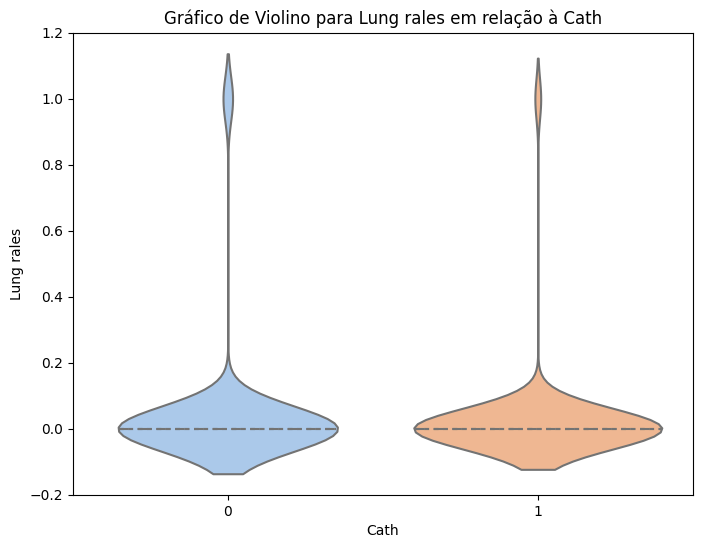

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Lung rales', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Lung rales em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Lung rales')
plt.show()

**Gráfico violino entre Systolic Murmur e Cath**

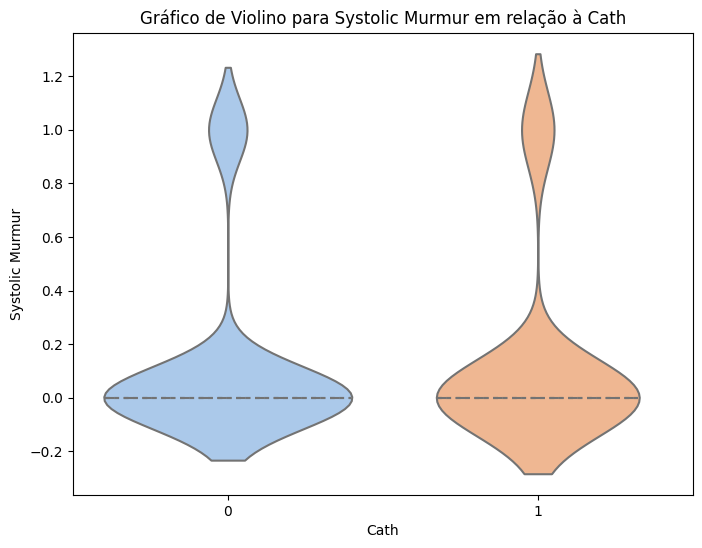

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Systolic Murmur', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Systolic Murmur em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Systolic Murmur')
plt.show()

**Gráfico entre Diastolic Murmur e Cath**

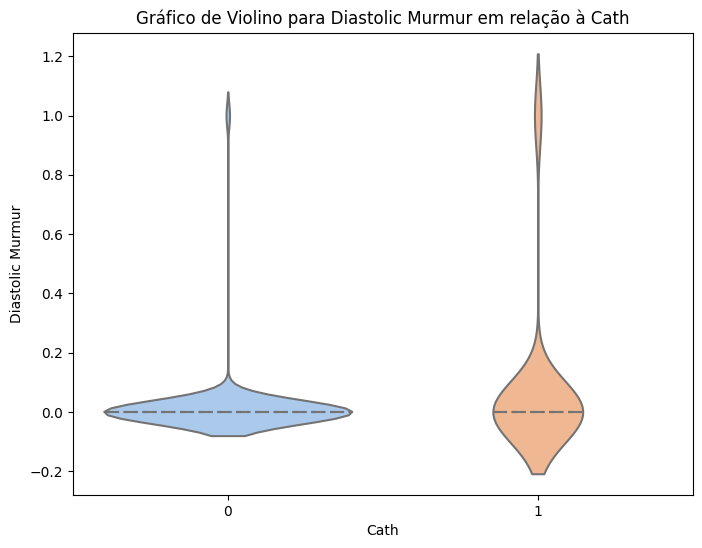

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Diastolic Murmur', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Diastolic Murmur em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Diastolic Murmur')
plt.show()

**Gráfico violino entre Typical Chest Pain e Cath**

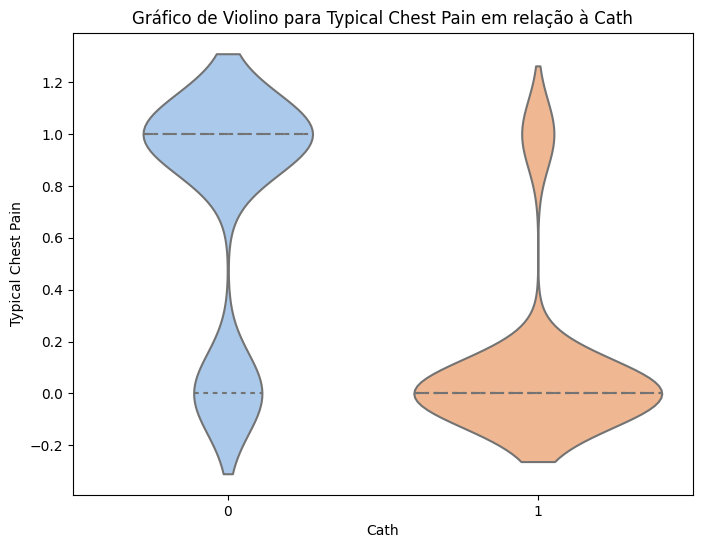

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Typical Chest Pain', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Typical Chest Pain em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Typical Chest Pain')
plt.show()

**Gráfico violino entre Dyspnea e Cath**

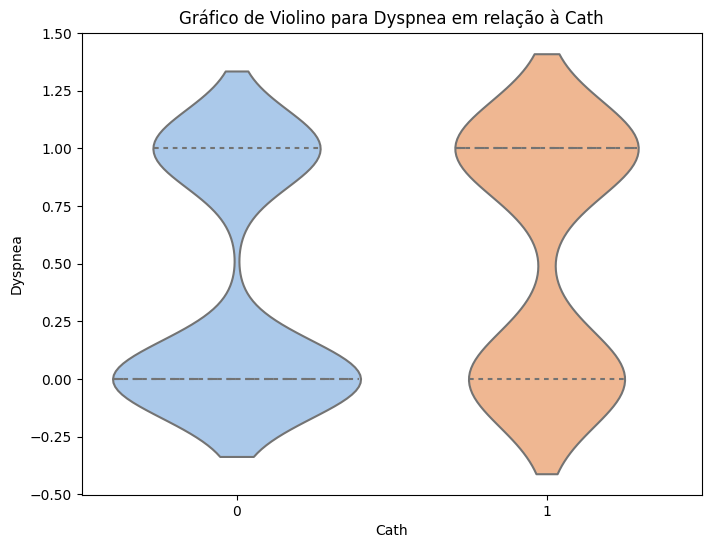

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Dyspnea', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Dyspnea em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Dyspnea')
plt.show()

**Gráfico violino entre Atypical e Cath**

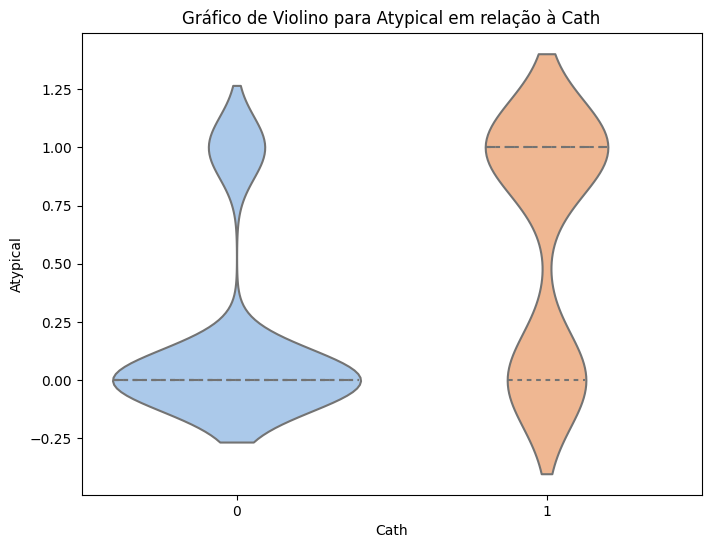

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Atypical', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Atypical em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Atypical')
plt.show()

**Gráfico violino entre Nonanginal e Cath**

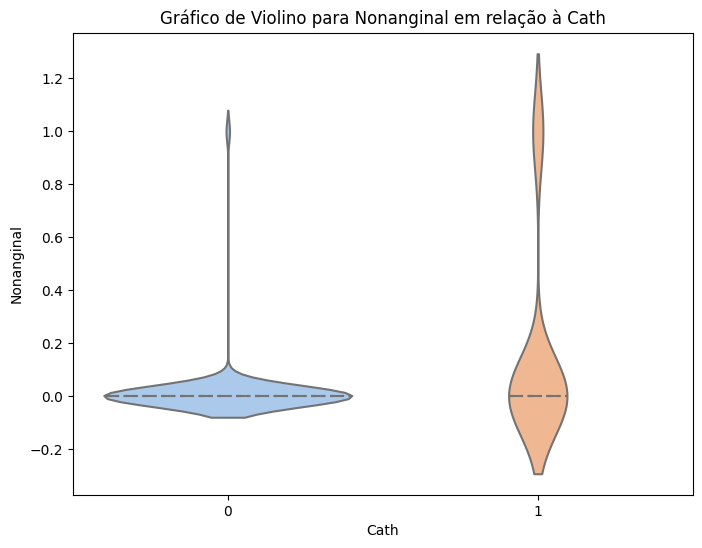

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Nonanginal', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Nonanginal em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Nonanginal')
plt.show()

**Gráfico violino entre Exertional CP e Cath**

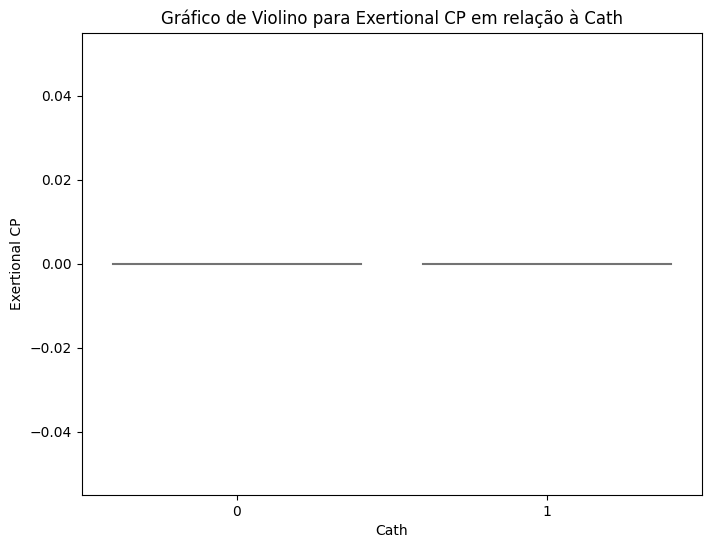

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Exertional CP', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Exertional CP em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Exertional CP')
plt.show()

**Gráfico violino entre LowTH Ang e Cath**

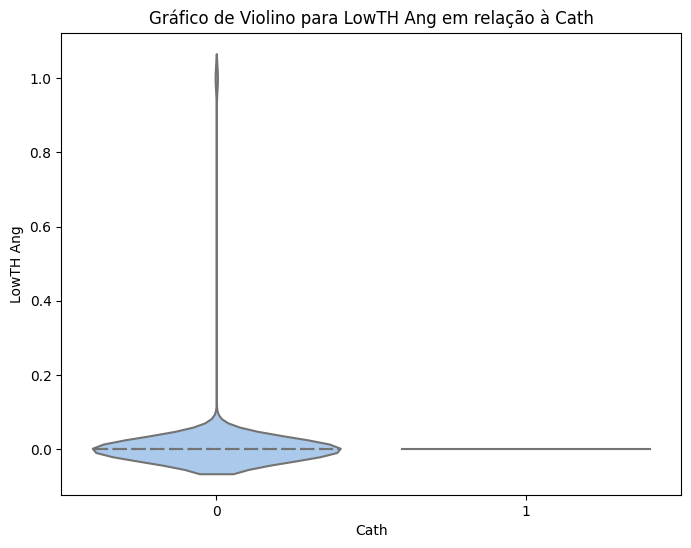

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='LowTH Ang', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para LowTH Ang em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('LowTH Ang')
plt.show()

**Gráfico violino entre Q Wave e Cath**

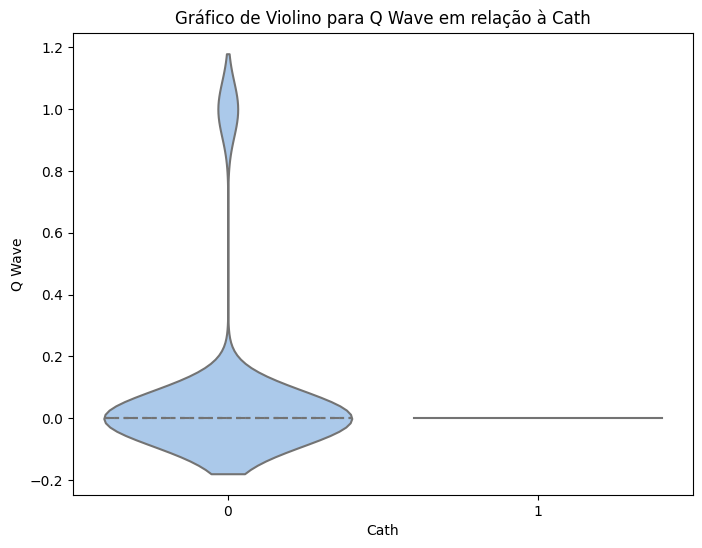

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Q Wave', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Q Wave em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Q Wave')
plt.show()

**Gráfico violino entre St Elevation e Cath**

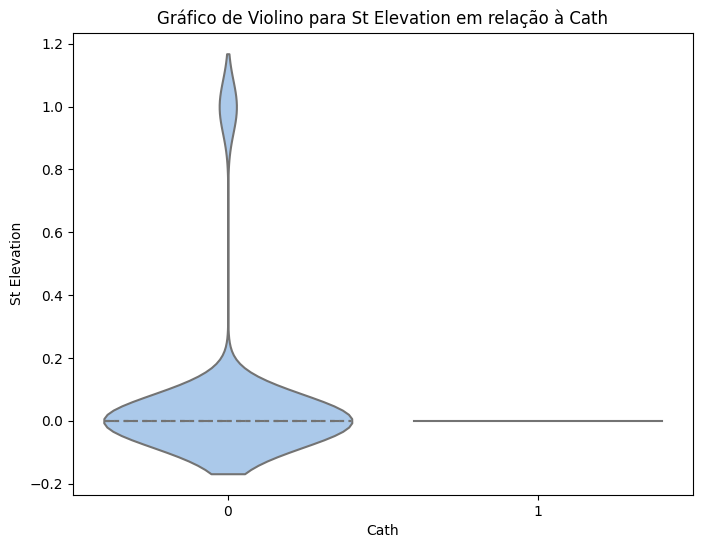

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='St Elevation', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para St Elevation em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('St Elevation')
plt.show()

**Gráfico violino entre St Depression e Cath**

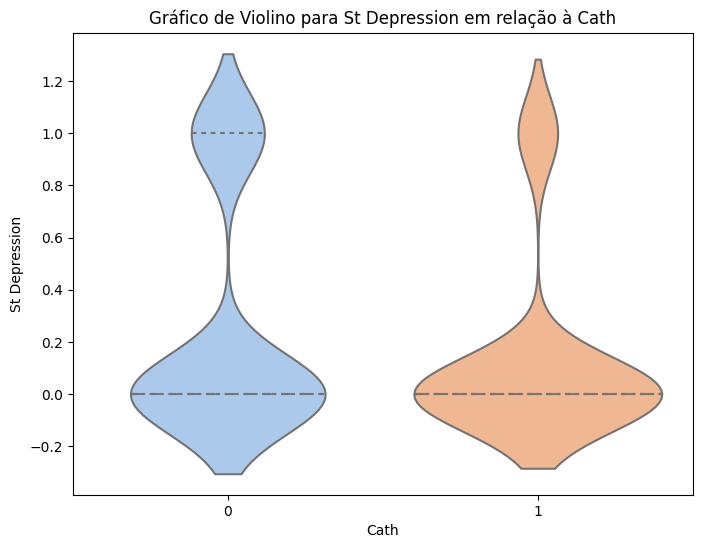

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='St Depression', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para St Depression em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('St Depression')
plt.show()

**Gráfico violino entre Tinversion e Cath**

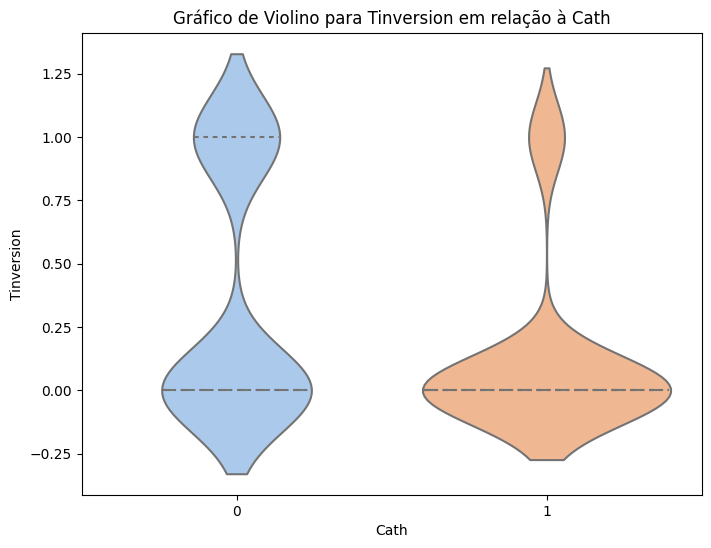

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Tinversion', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Tinversion em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Tinversion')
plt.show()

**Gráfico violino entre LVH e Cath**

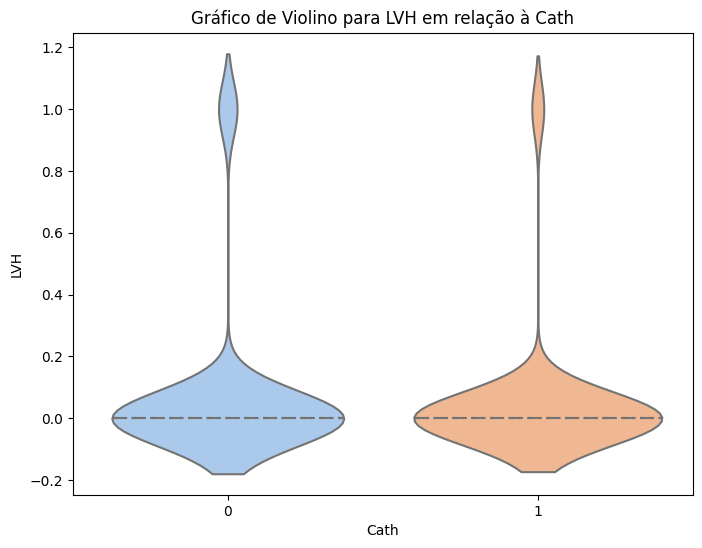

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='LVH', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para LVH em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('LVH')
plt.show()

**Gráfico violino entre Poor R Progression e Cath**

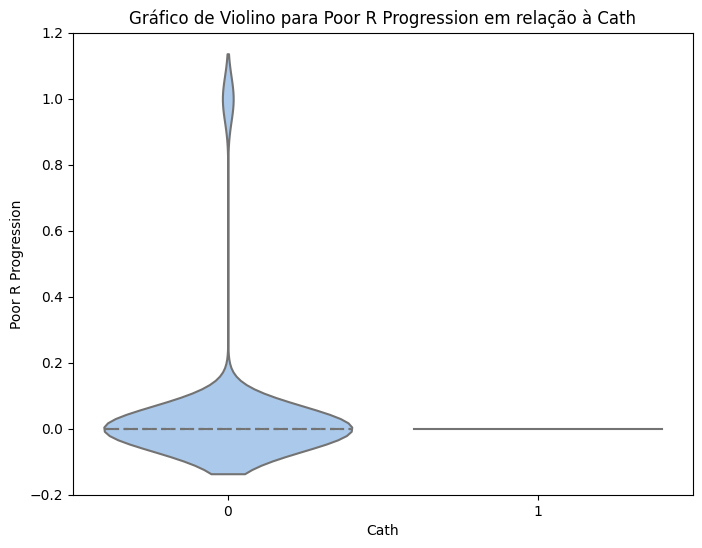

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cath', y='Poor R Progression', data=data, inner='quartile', palette='pastel')
plt.title('Gráfico de Violino para Poor R Progression em relação à Cath')
plt.xlabel('Cath')
plt.ylabel('Poor R Progression')
plt.show()

**Pelos gráficos violino dá para ter uma noção da relação entre as colunas binárias com a coluna alvo(Cath). Para não ficar somente em visualiazação, o teste qui-quadrado será aplicado nas colunas binárias.Note que o teste qui-quadrado refletiu diretamente o que os gráficos violinos trouxeram.**

**Teste Qui-Quadrado**

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
binarias_associadas = [] # Vetor que vai guardar as colunas que passarem no teste Qui-Quadrado
for coluna in colunas_binarias:
  if coluna == 'Cath': continue #Ignora a própria variável alvo
  # Crie uma tabela de contingência
  contingency_table = pd.crosstab(data[coluna], data['Cath'])

  # Calcule o teste qui-quadrado de independência
  chi2, p_val, dof, expected = chi2_contingency(contingency_table)

  print(f'\nTabela de Contingência para {coluna}:')
  print(contingency_table)
  print('\nResultado do Teste Qui-Quadrado:')
  print('Valor de Qui-Quadrado:', chi2)
  print('Valor p:', p_val)

  if p_val > 0.05:
      print(f'As proporções para {coluna} são provavelmente homogêneas (p-valor > 0.05)')
      binarias_associadas.append(coluna)
  else:
      print(f'As proporções para {coluna} não são homogêneas (p-valor <= 0.05)')



Tabela de Contingência para Sex:
Cath    0   1
Sex          
0      86  41
1     130  46

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 1.0780799559452123
Valor p: 0.29912748032994074
As proporções para Sex são provavelmente homogêneas (p-valor > 0.05)

Tabela de Contingência para DM:
Cath    0   1
DM           
0     136  77
1      80  10

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 18.174948228643895
Valor p: 2.0151216696088066e-05
As proporções para DM não são homogêneas (p-valor <= 0.05)

Tabela de Contingência para HTN:
Cath    0   1
HTN          
0      69  55
1     147  32

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 23.81341862168911
Valor p: 1.0613994174234381e-06
As proporções para HTN não são homogêneas (p-valor <= 0.05)

Tabela de Contingência para Current Smoker:
Cath              0   1
Current Smoker         
0               167  73
1                49  14

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 1.2611779376102294
Valor 

###Histograma das colunas ordinais

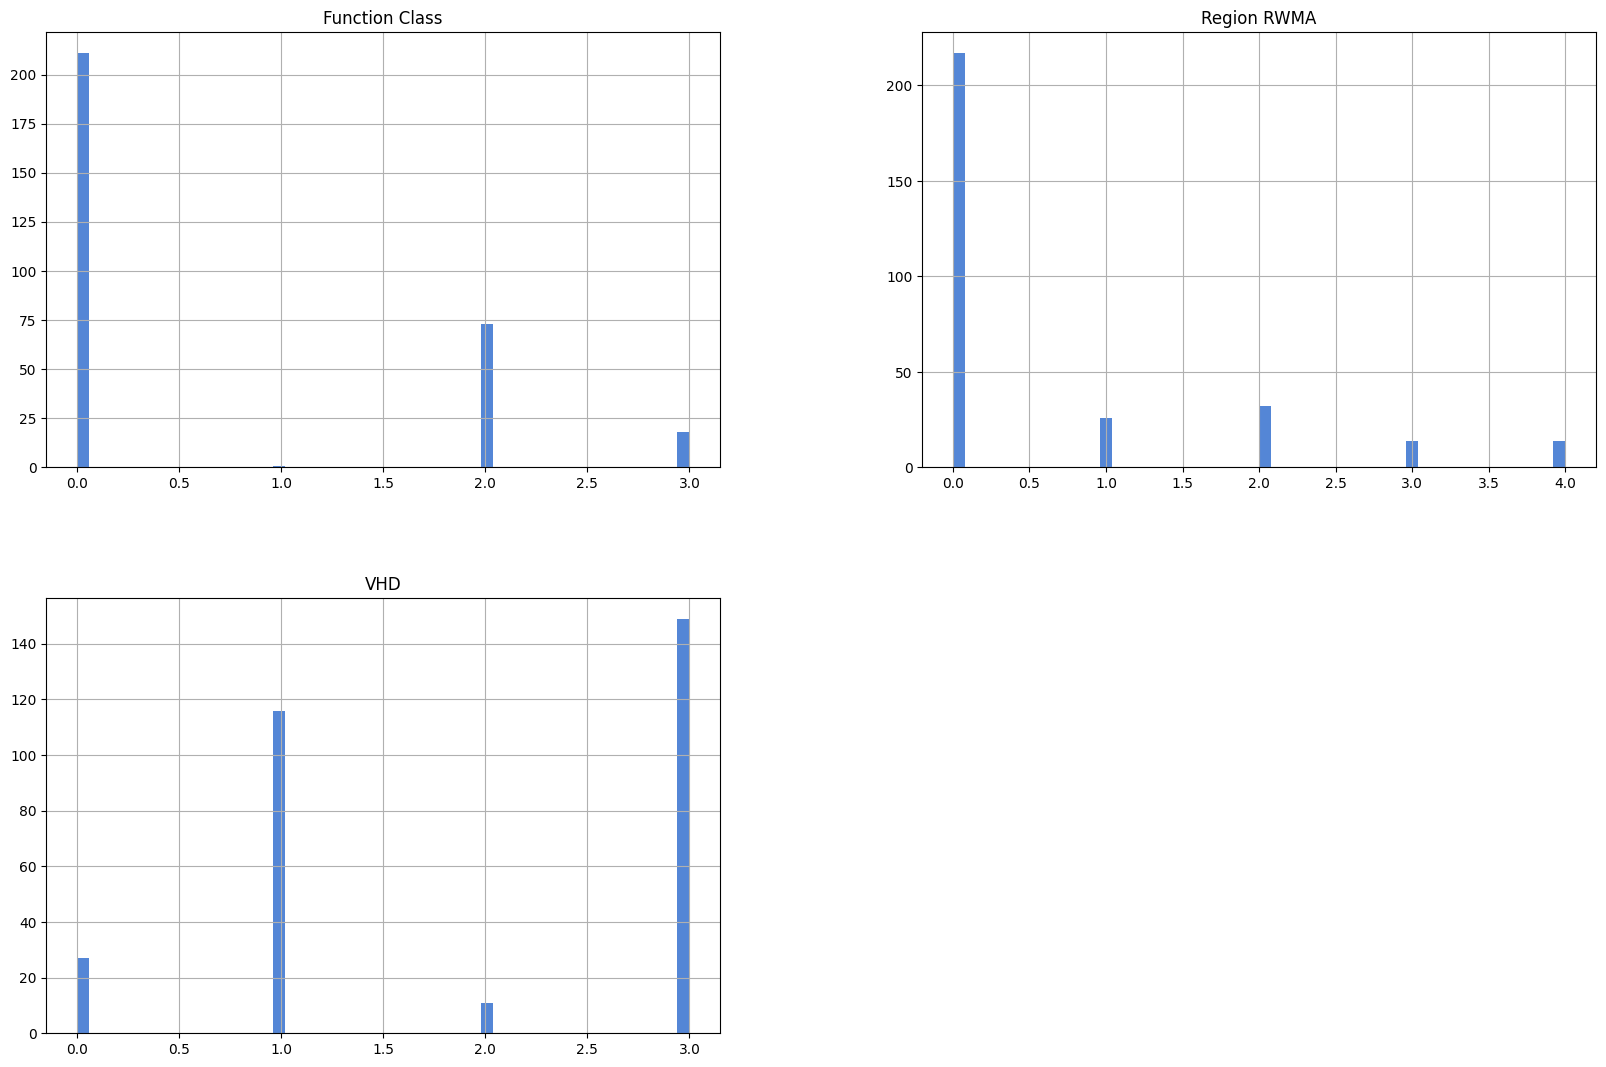

In [19]:
data_ordinais = data[colunas_ordinais]
data_ordinais.hist(bins=50, figsize=(20,13), color='#5486d6')
plt.show()

**Sucesso aqui para a análise que dizer que o paciente tem a doença**

**Comparação entre a coluna Function Class e Cath**

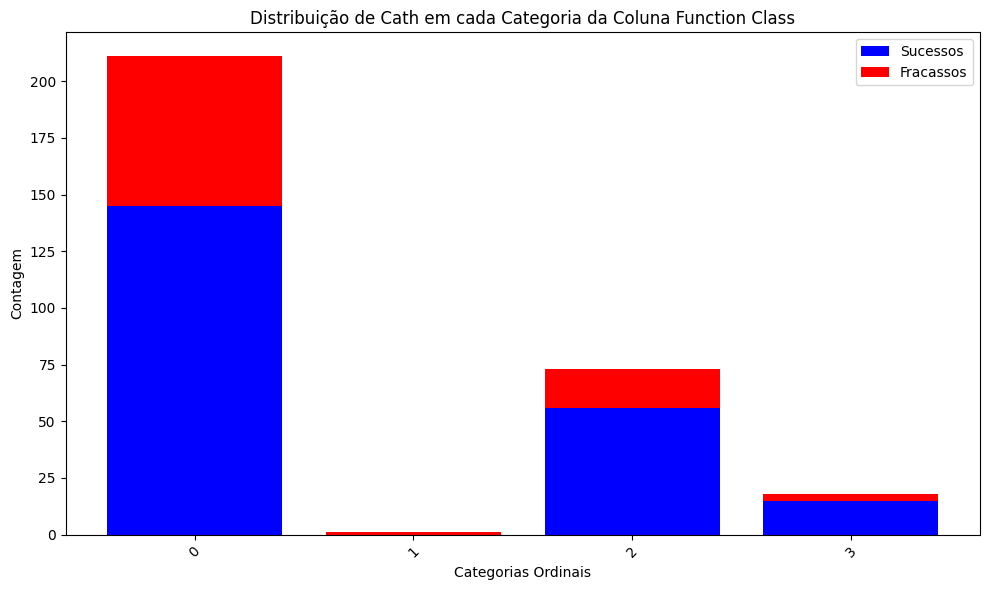

In [25]:
sucessos = [0, 0, 0, 0]
fracassos = [0, 0, 0, 0]
vetor_cath = data['Cath'].values
vetor_fc = data['Function Class'].values
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 0:
    sucessos[0] = sucessos[0] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 0:
    fracassos[0] = fracassos[0] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 1:
    sucessos[1] = sucessos[1] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 1:
    fracassos[1] = fracassos[1] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 2:
    sucessos[2] = sucessos[2] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 2:
    fracassos[2] = fracassos[2] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 3:
    sucessos[3] = sucessos[3] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 3:
    fracassos[3] = fracassos[3] + 1
# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
categorias = ['0', '1', '2', '3']
ax.bar(categorias, sucessos, label='Sucessos', color='b')
ax.bar(categorias, fracassos, bottom=sucessos, label='Fracassos', color='r')
ax.set_xlabel('Categorias Ordinais')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de Cath em cada Categoria da Coluna Function Class')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comparação entre a coluna Region RWMA e Cath**

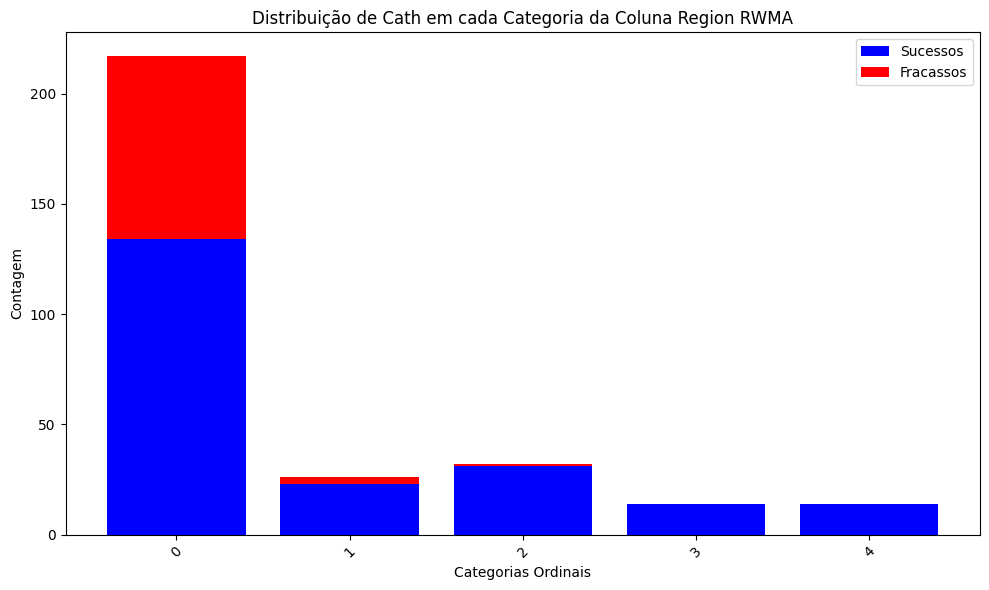

In [26]:
sucessos = [0, 0, 0, 0, 0]
fracassos = [0, 0, 0, 0, 0]
vetor_cath = data['Cath'].values
vetor_fc = data['Region RWMA'].values
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 0:
    sucessos[0] = sucessos[0] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 0:
    fracassos[0] = fracassos[0] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 1:
    sucessos[1] = sucessos[1] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 1:
    fracassos[1] = fracassos[1] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 2:
    sucessos[2] = sucessos[2] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 2:
    fracassos[2] = fracassos[2] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 3:
    sucessos[3] = sucessos[3] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 3:
    fracassos[3] = fracassos[3] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 4:
    sucessos[4] = sucessos[4] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 4:
    fracassos[4] = fracassos[4] + 1
# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
categorias = ['0', '1', '2', '3', '4']
ax.bar(categorias, sucessos, label='Sucessos', color='b')
ax.bar(categorias, fracassos, bottom=sucessos, label='Fracassos', color='r')
ax.set_xlabel('Categorias Ordinais')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de Cath em cada Categoria da Coluna Region RWMA')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comparação entre a coluna VHD e Cath**

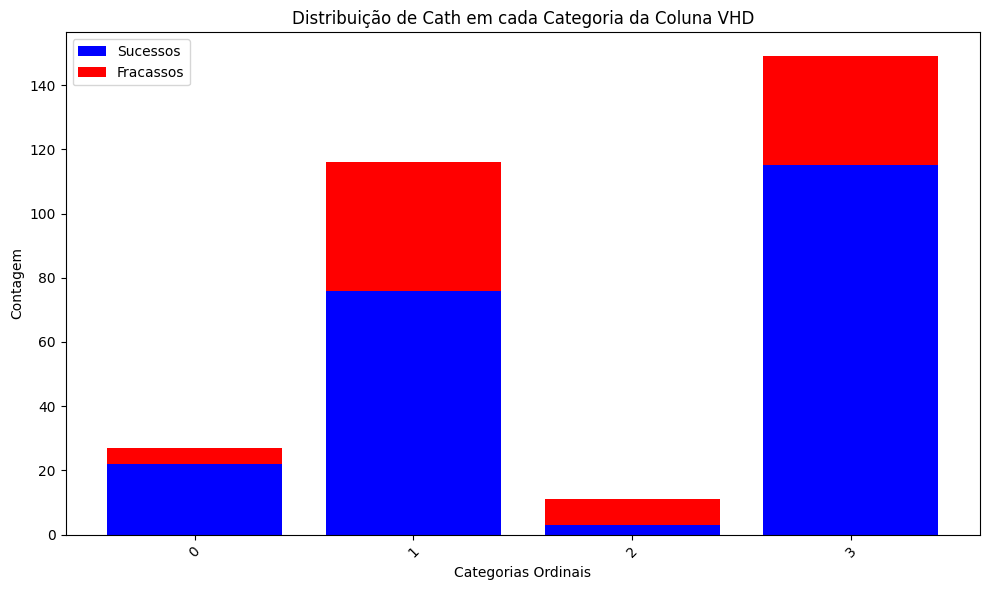

In [27]:
sucessos = [0, 0, 0, 0]
fracassos = [0, 0, 0, 0]
vetor_cath = data['Cath'].values
vetor_fc = data['VHD'].values
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 0:
    sucessos[0] = sucessos[0] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 0:
    fracassos[0] = fracassos[0] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 1:
    sucessos[1] = sucessos[1] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 1:
    fracassos[1] = fracassos[1] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 2:
    sucessos[2] = sucessos[2] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 2:
    fracassos[2] = fracassos[2] + 1
for i in range(len(vetor_cath)):
  if vetor_cath[i] == 0 and vetor_fc[i] == 3:
    sucessos[3] = sucessos[3] + 1
  elif vetor_cath[i] == 1 and vetor_fc[i] == 3:
    fracassos[3] = fracassos[3] + 1
# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
categorias = ['0', '1', '2', '3']
ax.bar(categorias, sucessos, label='Sucessos', color='b')
ax.bar(categorias, fracassos, bottom=sucessos, label='Fracassos', color='r')
ax.set_xlabel('Categorias Ordinais')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de Cath em cada Categoria da Coluna VHD')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Histograma das colunas contínuas

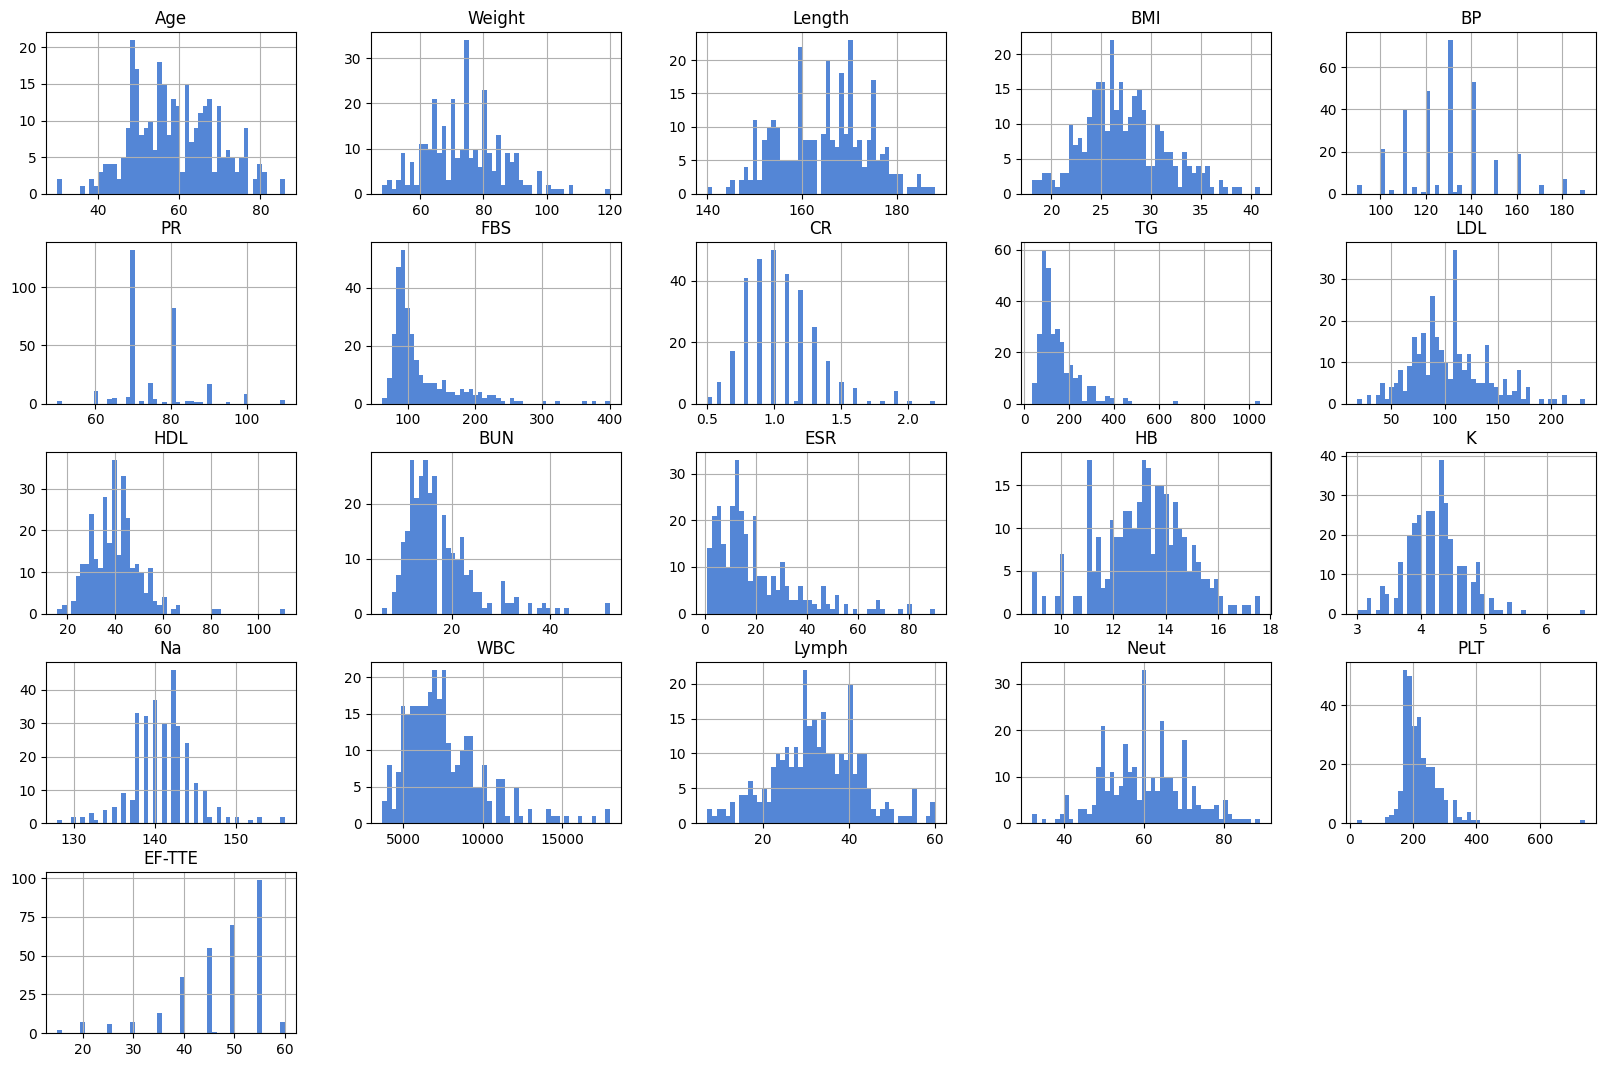

In [ ]:
data_continuas = data[colunas_continuas]
data_continuas.hist(bins=50, figsize=(20,13), color='#5486d6')
plt.show()

###Normalidade das colunas contínuas

**Note que somente 3 colunas do dataframe segue uma distribuição normal**

In [ ]:
from scipy.stats import shapiro
for i in colunas_continuas:
  stat, p_value = shapiro(data[i])
  if p_value > 0.05:
      print(f'A coluna {i} provavelmente segue uma distribuição normal--p_value = {p_value}--Estatística do teste = {stat}')
  else:
      print(f'A coluna {i} provavelmente NÃO segue uma distribuição normal--p_value = {p_value}--Estatística do teste = {stat}')


A coluna Age provavelmente NÃO segue uma distribuição normal--p_value = 0.03161336109042168--Estatística do teste = 0.9897385239601135
A coluna Weight provavelmente NÃO segue uma distribuição normal--p_value = 0.007979177869856358--Estatística do teste = 0.9870180487632751
A coluna Length provavelmente NÃO segue uma distribuição normal--p_value = 0.024479975923895836--Estatística do teste = 0.989240288734436
A coluna BMI provavelmente NÃO segue uma distribuição normal--p_value = 0.004062797408550978--Estatística do teste = 0.9856399297714233
A coluna BP provavelmente NÃO segue uma distribuição normal--p_value = 4.03775786139704e-08--Estatística do teste = 0.9543012976646423
A coluna PR provavelmente NÃO segue uma distribuição normal--p_value = 6.633648111309604e-16--Estatística do teste = 0.8601563572883606
A coluna Function Class provavelmente NÃO segue uma distribuição normal--p_value = 3.5481888693857747e-25--Estatística do teste = 0.6264820694923401
A coluna FBS provavelmente NÃO s

**Colunas que passaram no teste Qui-Quadrado**

In [ ]:
print(f'Colunas que passaram no teste: {binarias_associadas}')
print(f'{len(binarias_associadas)} colunas passaram no teste em um total de {len(colunas_binarias)} colunas')

Colunas que passaram no teste: ['Sex', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression']
19 colunas passaram no teste em um total de 31 colunas


###Associação entre as colunas contínuas e a variável alvo(Cath)

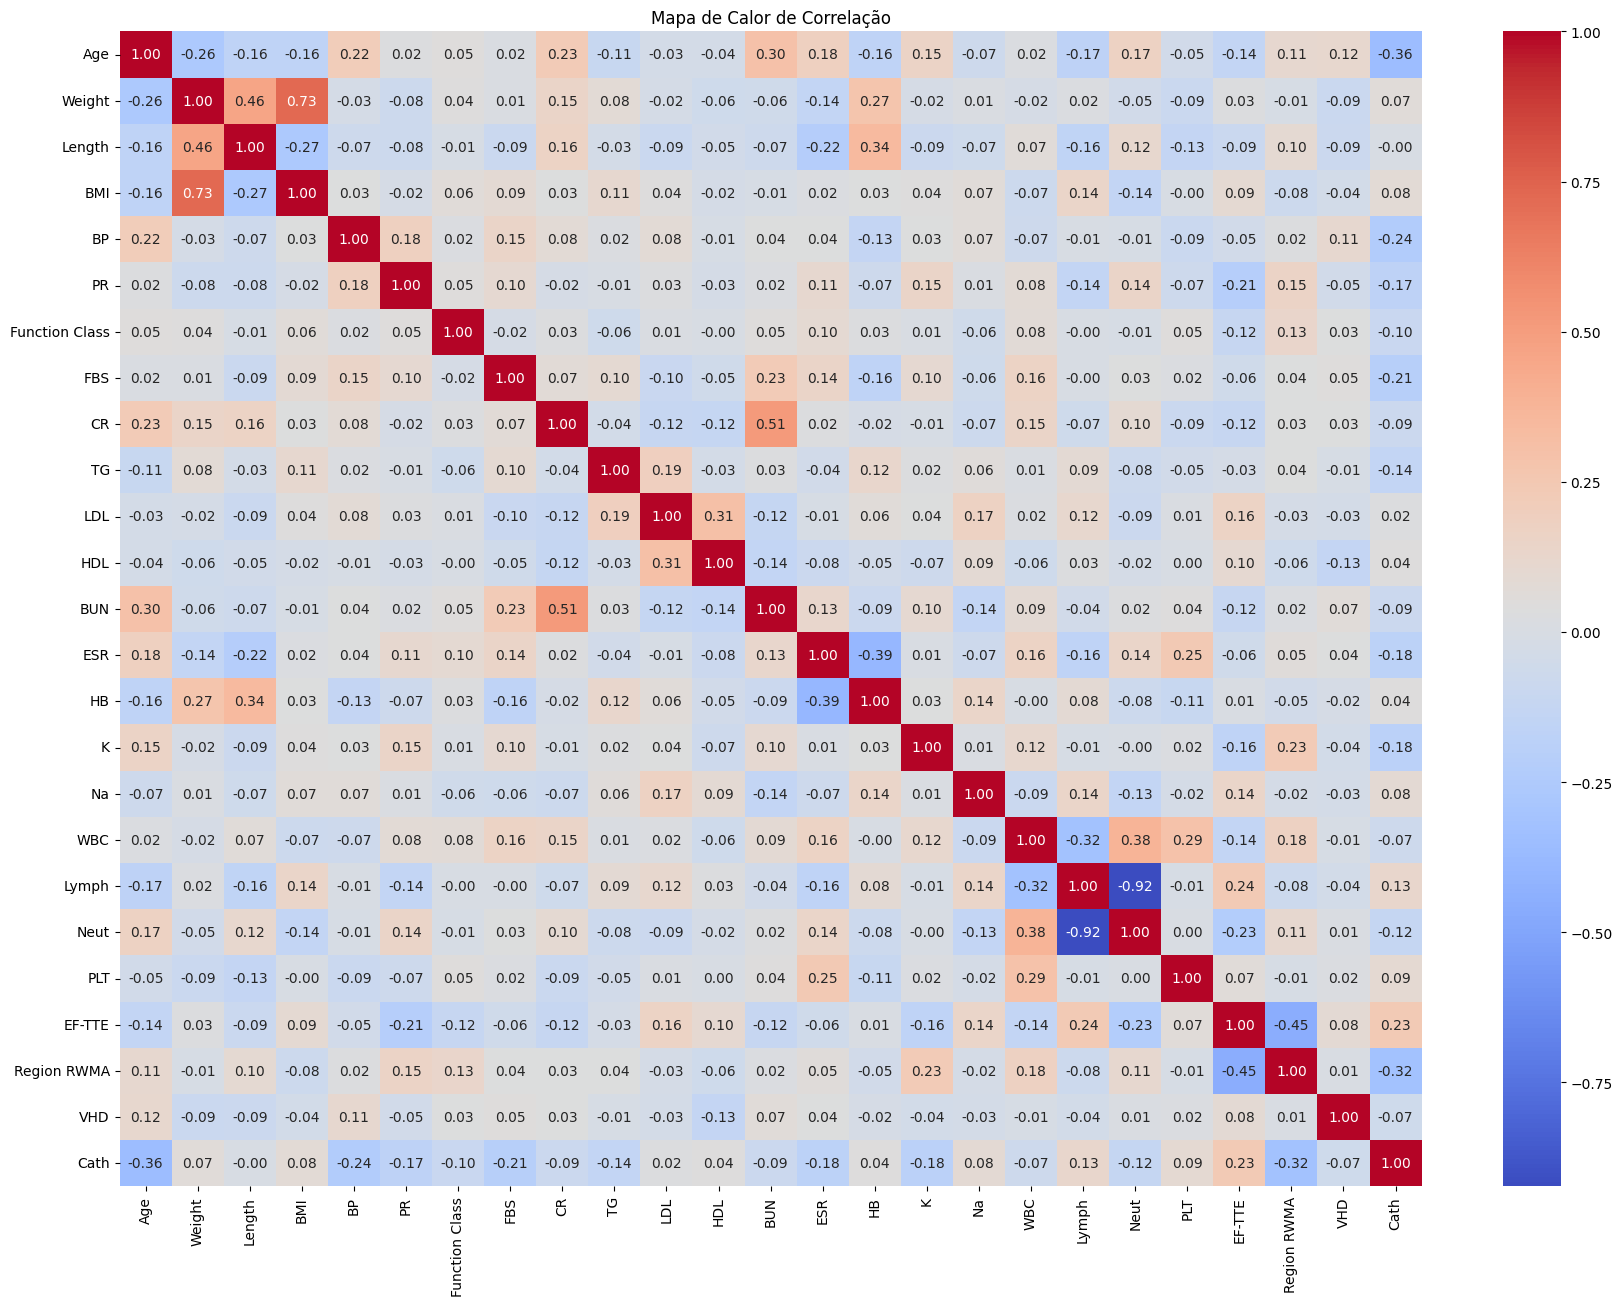

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colunas_continuas.append('Cath')
data_continuas = data[colunas_continuas]
correlation_matrix = data_continuas.corr()
plt.figure(figsize=(21, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

**Foram selecionadas as colunas que possuem 0.2 em módulo de correlação com a coluna alvo(Cath), uma correlação de 0.2 em módulo representa uma correlação de fraca a moderada em relação a coluna alvo.**

In [ ]:
def selecao_cor(data, target_column, correlation_threshold):
    corr = data.corr()[target_column]
    selecionadas = corr[corr.abs() > correlation_threshold].index
    return selecionadas

corr = 0.20 # Taxa de correlação
colunas_selecionadas = selecao_cor(data_continuas, 'Cath', corr)
print(f'As colunas {colunas_selecionadas} foram selecionadas')

As colunas Index(['Age', 'BP', 'FBS', 'EF-TTE', 'Region RWMA', 'Cath'], dtype='object') foram selecionadas


###Mesclagem

In [ ]:
continuas_associadas = []
for i in colunas_selecionadas:
  continuas_associadas.append(i)
selecionadas = continuas_associadas + binarias_associadas
#selecionadas.append('Cath')
data = data[selecionadas]
display(data.head())

,Age,BP,FBS,EF-TTE,Region RWMA,Cath,Sex,Current Smoker,EX-Smoker,FH,...,CHF,DLP,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Exertional CP,LowTH Ang,LVH,Poor R Progression
0,53,110,90,50,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,67,140,80,40,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,54,100,85,40,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,66,100,78,55,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,110,104,50,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
len(selecionadas)

25

#Machine learning

**Como o dataframe possui muitas colunas a eliminação de  algumas colunas que não tem uma correlação linear com a variável alvo séria uma opção para diminuir a complexidade do problema. Note que deve-se também analisar outros tipos de correlação entre as variáveis, mas por questão de teste vou eliminar primeiramente essas colunas não possuem essa de correlação de linearidade com a variável alvo, se os algoritmos de Machine Learning não tiverem uma boa acurácia, uma opção seria analisar essas correlações não lineares e outras estatísticas de correlação, como testes de hipóteses e etc.**

## Criando um classificador de árvore de decisão

In [ ]:
x = data.drop(data.columns[[-1]], axis=1).values
y = data.iloc[:,-1].values

**Divindindo entre conjunto de testes e conjunto de treinamento**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 55)

**Padronização do conjunto de testes e treinamento**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Classificador de árvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_Ad = DecisionTreeClassifier(criterion = 'entropy', random_state = 55)
classifier_Ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=55)

**Plot da árvore de decisão gerada pelo classificador**

[Text(0.25, 0.95, 'x[2] <= -0.132\nentropy = 0.232\nsamples = 212\nvalue = [204, 8]'),
 Text(0.1875, 0.85, 'entropy = 0.0\nsamples = 142\nvalue = [142, 0]'),
 Text(0.3125, 0.85, 'x[1] <= 1.26\nentropy = 0.513\nsamples = 70\nvalue = [62, 8]'),
 Text(0.25, 0.75, 'x[1] <= -0.28\nentropy = 0.579\nsamples = 58\nvalue = [50, 8]'),
 Text(0.125, 0.65, 'x[0] <= 0.622\nentropy = 0.267\nsamples = 22\nvalue = [21, 1]'),
 Text(0.0625, 0.55, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.1875, 0.55, 'x[0] <= 1.176\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.65, 'x[2] <= -0.073\nentropy = 0.711\nsamples = 36\nvalue = [29, 7]'),
 Text(0.3125, 0.55, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.55, 'x[0] <= -1.443\nentropy = 0.661\nsamples = 35\nvalue = [29, 6]'),
 Text(0.375, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),


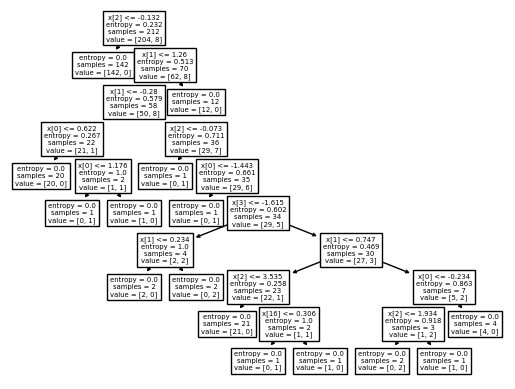

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier_Ad)

**Predições**

In [ ]:
predictions = classifier_Ad.predict(X_test)

**A acurácia da árvore de decisão saiu-se relativamente boa.**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9120879120879121


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        90
           1       0.11      1.00      0.20         1

    accuracy                           0.91        91
   macro avg       0.56      0.96      0.58        91
weighted avg       0.99      0.91      0.95        91



[[82  8]
 [ 0  1]]


###Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 55)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=55)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy:  0.989010989010989


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



[[90  0]
 [ 1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###SVM

In [ ]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf', random_state = 55)
classifier_SVM.fit(X_train, y_train)

SVC(random_state=55)

In [ ]:
y_pred_SVM = classifier_SVM.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred_SVM))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,y_pred_SVM))
print("\n")
print(confusion_matrix(y_test,y_pred_SVM))

Accuracy:  0.989010989010989


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



[[90  0]
 [ 1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
vetor = data['Cath'].values
vetor.T

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [ ]:
data['Cath'].value_counts()

0    216
1     87
Name: Cath, dtype: int64

In [ ]:
vetor[0][0]
cont = 0
for i in range(len(vetor)):
  if vetor[0][i] == 1:
    cont = cont + 1

IndexError: ignored